{2, 4, 6}


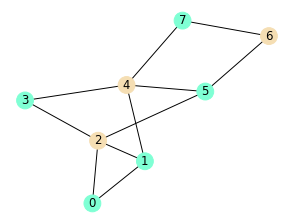

In [66]:
from networkx.algorithms.matching import maximal_matching

__all__ = ["min_weighted_dominating_set",
           "min_edge_dominating_set"]



def min_weighted_dominating_set(G, weight=None):
    if len(G) == 0:
        return set()

    dom_set = set()

    def _cost(node_and_neighborhood):
        v, neighborhood = node_and_neighborhood
        return G.nodes[v].get(weight, 1) / len(neighborhood - dom_set)


    vertices = set(G)

    neighborhoods = {v: {v} | set(G[v]) for v in G}


    while vertices:

        dom_node, min_set = min(neighborhoods.items(), key=_cost)
        dom_set.add(dom_node)
        del neighborhoods[dom_node]
        vertices -= min_set

    return dom_set



def min_edge_dominating_set(G):
   
    if not G:
        raise ValueError("Expected non-empty NetworkX graph!")
    return maximal_matching(G)

import networkx
from networkx.algorithms.dominating import dominating_set
from networkx.algorithms.dominating import is_dominating_set

import matplotlib.pyplot as plt
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
G = networkx.Graph()
H = networkx.path_graph(8)
G.add_edges_from(H.edges())
G.add_edges_from([(0, 1)])
G.add_edges_from([(0, 2)])
G.add_edges_from([(2, 3)])
G.add_edges_from([(1, 4)])
G.add_edges_from([(2, 5)])
G.add_edges_from([(4, 7)])

color_map = []

domi = min_weighted_dominating_set(G)
print(domi)

for node in G:
    if node in domi:
        color_map.append('wheat')
    else: 
        color_map.append('aquamarine')      
networkx.draw(G, node_color=color_map, with_labels=True)

plt.show()